In [1]:
import numpy as np
import pandas as pd

In [2]:
county = pd.read_csv("../../data/data.csv")
county['YEAR'] = county['YEAR'].astype(str)
print("Max Year:", county['YEAR'].max())
print("Min Year:", county['YEAR'].min())

Max Year: 2018
Min Year: 2011


In [5]:
county.head(3).to_csv('data10.csv')


In [6]:
county["Food_Insecurity_Rate"].describe()

count    31419.000000
mean         0.145205
std          0.041776
min          0.024000
25%          0.117000
50%          0.141000
75%          0.168000
max          0.379000
Name: Food_Insecurity_Rate, dtype: float64

In [7]:
bins = [0, 0.117, 0.141, 0.168, 1]  # 1 is just a safe upper bound
labels = ["Low", "Moderate", "Elevated", "High"]

county["FI_Category"] = pd.cut(
    county["Food_Insecurity_Rate"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

county["FI_Category"].value_counts()

FI_Category
Low         8003
Moderate    7843
High        7801
Elevated    7772
Name: count, dtype: int64

### Step 1: Dropping Non-Predictive Columns

In [ ]:
drop_cols = [
    "FIPS",
    "County",
    "State",
    "Year",
    "Food_Insecurity_Rate",
    "Num_Food_Insecure_Persons",
    "FI_Category"   # target
]

X = county.drop(columns=drop_cols)
y = county["FI_Category"]
X.head(3).T

,0,1,2
Food_Insecurity_Rate,0.156,0.129,0.219
Num_Food_Insecure_Persons,8620.0,26860.0,5650.0
Low_Threshold_State,1.3,1.3,1.3
Low_Threshold_Type,SNAP,SNAP,SNAP
High_Threshold_State,1.85,1.85,1.85
High_Threshold_Type,Other Nutrition Program,Other Nutrition Program,Other Nutrition Program
Pct_FI_Below_Low_Threshold,0.462,0.371,0.651
Pct_FI_Between_Thresholds,0.132,0.187,0.108
Pct_FI_Above_High_Threshold,0.405,0.442,0.241
Child_Food_Insecurity_Rate,0.214,0.169,0.32


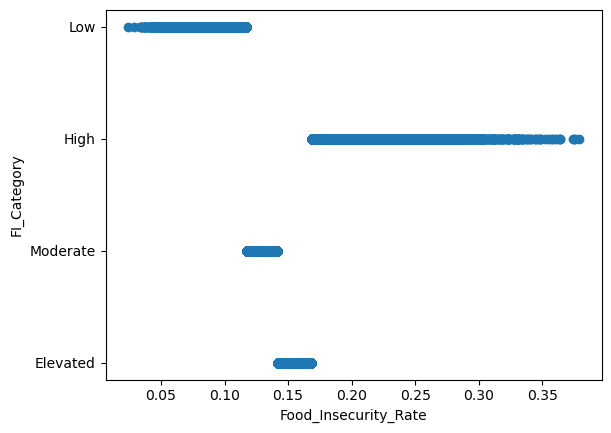

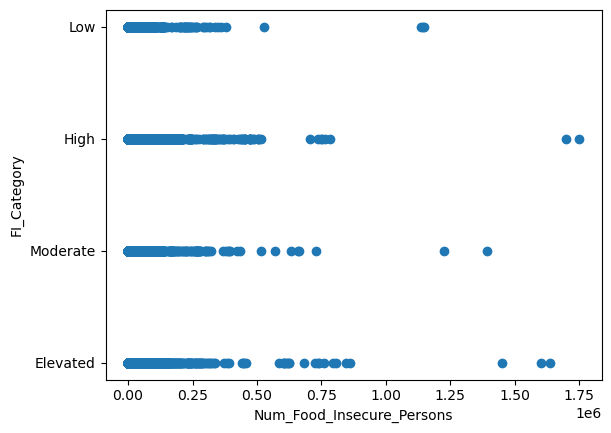

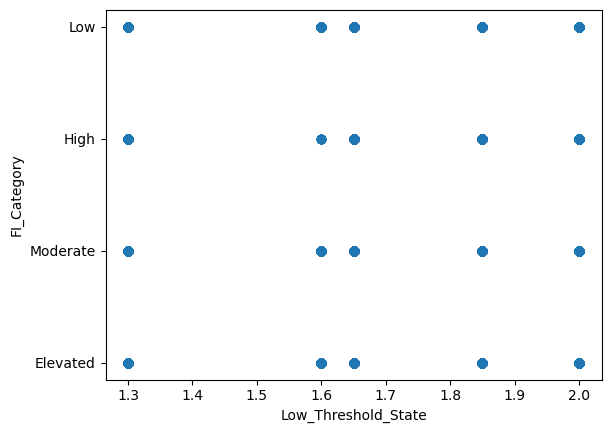

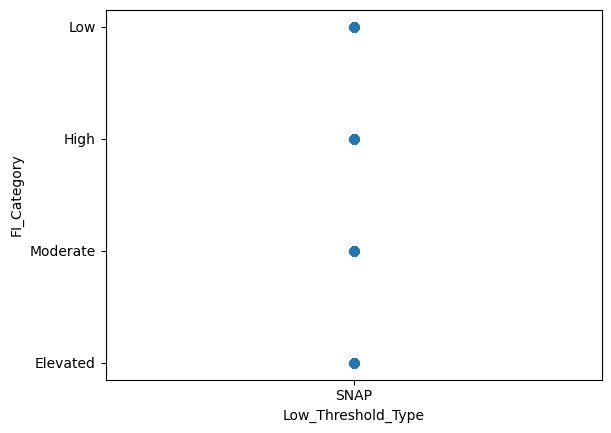

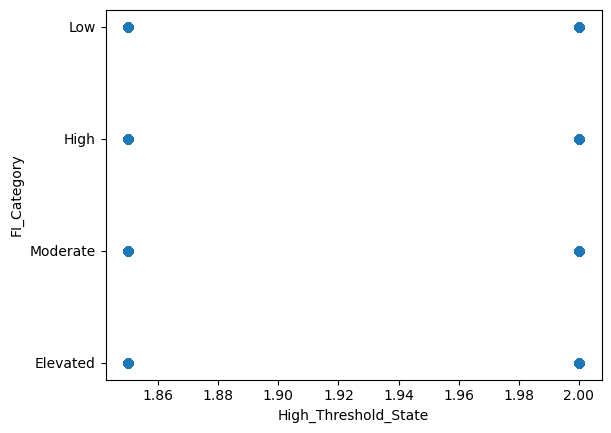

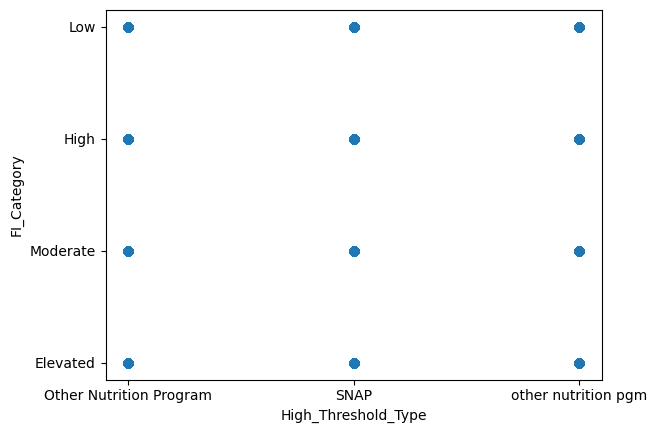

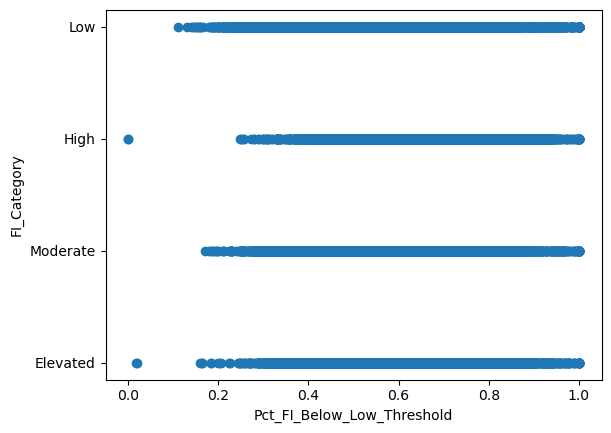

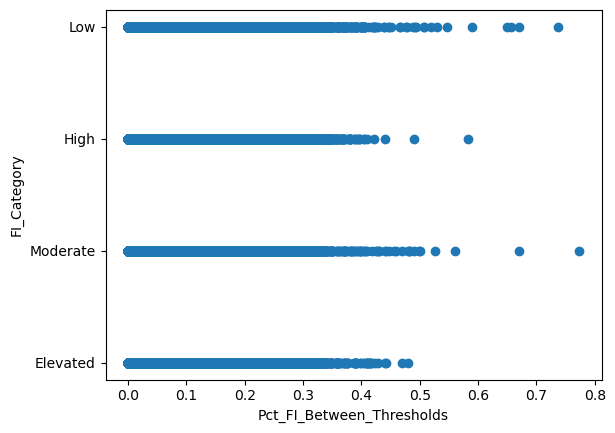

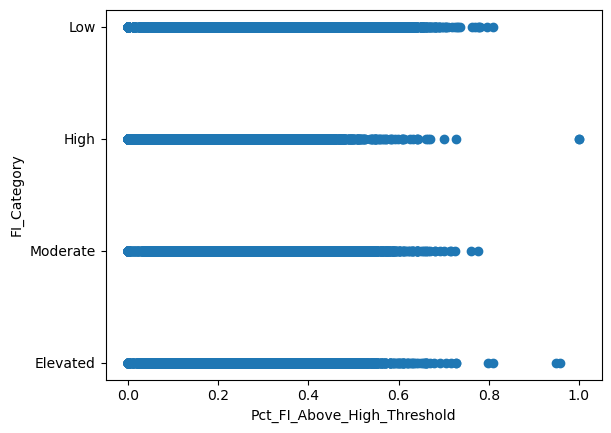

TypeError: 'value' must be an instance of str or bytes, not a float

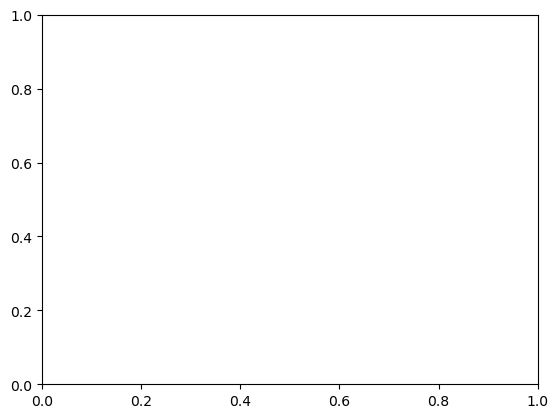

In [11]:
# scatterplot of all features
import matplotlib.pyplot as plt

for col in X.columns:
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel("FI_Category")
    plt.show()